# Sistema Masa-Resorte en 2D

## Análisis Teórico

El sistema de una masa $m$ unida a un resorte sin masa en un espacio bidimensional se modela con la **segunda ley de Newton** y la **ley de Hooke**. Definamos las ecuaciones del movimiento.

---

### **1. Formulación del problema**
La masa está sometida a dos fuerzas principales:

- **Fuerza del resorte**: Según la ley de Hooke:
  $$
  \mathbf{F}_s = -k (\ell - \ell_0) \hat{r}
  $$
  donde $k$ es la constante del resorte, $\ell$ es la distancia de la masa al origen y $\ell_0$ es la longitud en reposo del resorte. La dirección del resorte está dada por el vector unitario $\hat{r}$.

- **Fuerza de amortiguamiento** (si se considera un medio viscoso con coeficiente de amortiguamiento $b$):
  $$
  \mathbf{F}_d = -b \mathbf{v}
  $$

Aplicando la segunda ley de Newton:
  $$
  m \frac{d^2 \mathbf{r}}{dt^2} = -k (\ell - \ell_0) \hat{r} - b \frac{d\mathbf{r}}{dt}
  $$

Dado que el movimiento es en **2D**, expresamos la posición en coordenadas polares:
$$
\mathbf{r} = r \hat{r}, \quad \mathbf{v} = \dot{r} \hat{r} + r \dot{\theta} \hat{\theta}
$$

La aceleración en coordenadas polares es:
$$
\mathbf{a} = (\ddot{r} - r\dot{\theta}^2) \hat{r} + (r\ddot{\theta} + 2\dot{r} \dot{\theta}) \hat{\theta}
$$

---

### **2. Ecuaciones diferenciales del movimiento**
Descomponiendo en componentes radiales y angulares:

1. **Ecuación radial**:
   $$
   m(\ddot{r} - r\dot{\theta}^2) = -k(r - r_0) - b\dot{r}
   $$
   O, reescribiendo:
   $$
   \ddot{r} + \frac{b}{m} \dot{r} + \frac{k}{m} (r - r_0) = r\dot{\theta}^2
   $$

2. **Ecuación angular** (por conservación del momento angular si no hay fuerzas externas en $\hat{\theta}$):
   $$
   m(r\ddot{\theta} + 2\dot{r} \dot{\theta}) = 0
   $$
   $$
   r\ddot{\theta} + 2\dot{r} \dot{\theta} = 0
   $$

---

### **3. Solución Analítica**
Sin amortiguamiento ($b = 0$) y asumiendo que el término $r\dot{\theta}^2$ es pequeño, la ecuación radial se reduce a una ecuación diferencial de oscilador armónico:
$$
\ddot{r} + \frac{k}{m} (r - r_0) = 0
$$

La solución general es:
$$
r(t) = r_0 + A \cos(\omega t + \phi)
$$
donde $A$ y $\phi$ dependen de las condiciones iniciales, y la frecuencia natural del sistema es:
$$
\omega = \sqrt{\frac{k}{m}}
$$

Para la ecuación angular:
$$
\frac{d}{dt} (r^2 \dot{\theta}) = 0 \quad \Rightarrow \quad r^2 \dot{\theta} = L
$$
donde $L$ es el momento angular por unidad de masa. Esto sugiere que el movimiento sigue una trayectoria elíptica o circular dependiendo de las condiciones iniciales.

---

### **Conclusión**
- La ecuación radial es una oscilación armónica simple con desplazamiento alrededor de $r_0$.
- La ecuación angular indica conservación del momento angular, lo que implica que la masa sigue un movimiento oscilatorio en torno a $r_0$, describiendo una trayectoria cerrada si $L \neq 0$.

El sistema tiene **solución analítica exacta** en términos de funciones trigonométricas, siempre que la fuerza elástica sea la única fuerza presente o el amortiguamiento sea lineal.


In [104]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mass_spring_system import Mass, Spring, System

In [110]:
# Plotting functions

def plot_trayectory(x, y):
    plt.figure(figsize=(8, 6))
    plt.plot(x[0], y[0], "ro", label="Initial point")  
    plt.plot(x[-1], y[-1], "gx", label="Final point")
    plt.plot(x, y, label="Trajectory")
    plt.title("2D Mass-Spring System")
    plt.xlabel("Position X (m)")
    plt.ylabel("Position Y (m)")
    plt.grid()
    plt.legend()
    plt.show()

def plot_3d(t, x, y): 
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x[0], y[0], t[0], "ro", label="Initial point")
    ax.scatter(x[-1], y[-1], t[-1], "xo", label="Final point")
    ax.plot(x, y, t, label="Trajectory")  # x, y, t
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Time")
    plt.show()

def plot_fase_space(x, vx, y, vy):
    plt.figure(figsize=(12, 6))
    # x vs vx
    plt.subplot(1, 2, 1)
    plt.plot(x, vx, label="x vs vx", color="red")
    plt.xlabel("Position (m)")
    plt.ylabel("Velocity (m/s)")
    plt.title("Fase Space x vs vx")
    plt.grid()
    plt.legend()
    
    # # y vs vy
    plt.subplot(1, 2, 2)
    plt.plot(y, vx, label="y vs vy", color="red")
    plt.xlabel("Position (m)")
    plt.ylabel("Velocity (m/s)")
    plt.title("Fase Space y vs vy")
    plt.grid()
    plt.legend()

    # # Radial Face Space
    # r = np.sqrt(x**2 + y**2)
    # vr = r = np.sqrt(vx**2 + vy**2)
    # plt.figure(figsize=(8, 6))
    # plt.plot(x, y, label="r vs vr")
    # plt.title("Fase Space")
    # plt.xlabel("Position (m)")
    # plt.ylabel("Velocity (m/s)")
    # plt.grid()
    # plt.legend()
    # plt.show()


def plot_enery_time(t, kin, pot, tot): 
    plt.subplot(2, 1, 2)
    plt.plot(time, E_kin, label="Kinetic Energy", color="orange")
    plt.plot(time, E_pot, label="Potencial Energy", color="purple")
    plt.plot(time, E_total, label="Total Energy", color="black", linestyle="dashed")
    plt.xlabel("Time (s)")
    plt.ylabel("Energy (J)")
    plt.title("Sistem Energy")
    plt.grid()
    plt.legend()

In [ ]:
def cartesian_to_polar(x, y):
    r = np.sqrt(x**2 + y**2)  # Radio
    theta = np.arctan2(y, x)  # Ángulo (en radianes)
    return r, theta

### Simulación sin Amortiguamiento

In [97]:
# System parameters
mass = Mass(position=[1.0, 0.0], velocity=[1.0, 2.0], mass=1.0)
spring = Spring(k=10.0, rest_length=1.0)
system = System(mass=mass, spring=spring, damping=0.1)

In [ ]:
# Simulation
t_max = 20.0
dt = 0.01
system.simulate(t_max, dt)

In [100]:
# Get results
data_file = "data/simulation_data.dat"
data = np.loadtxt(data_file, skiprows=1)
data.shape

time = data[:, 0]
x, y = data[:, 1], data[:, 2]
vx, vy = data[:, 3], data[:, 4]
E_kin, E_pot, E_total = data[:, 5], data[:, 6], data[:, 7]

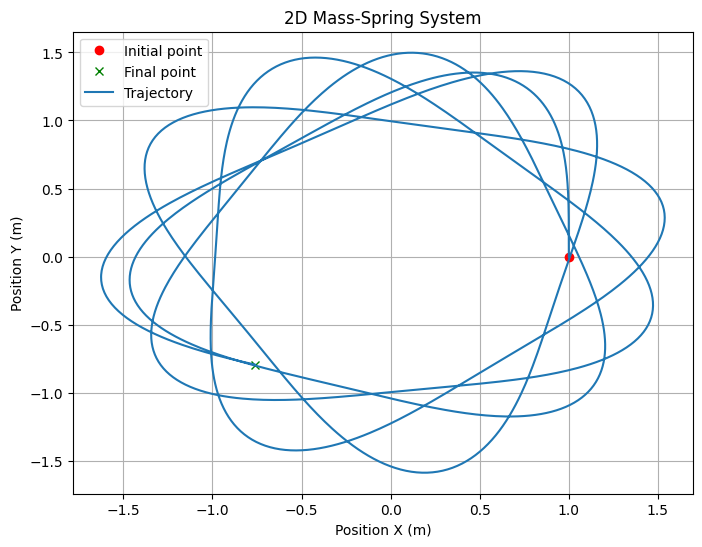

In [101]:
plot_trayectory(x, y)

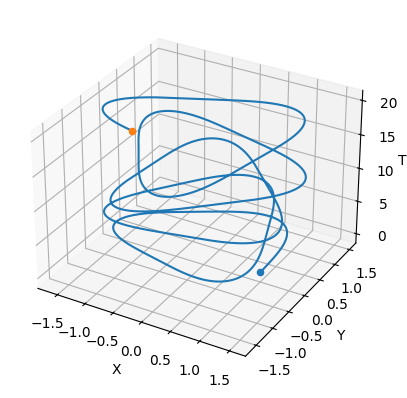

In [111]:
plot_3d(time, x, y,)

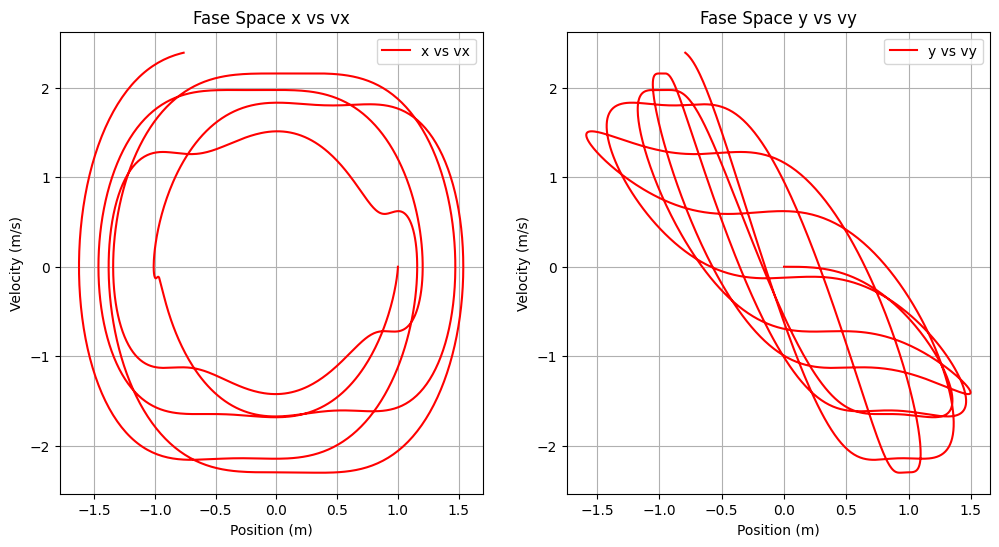

In [102]:
plot_fase_space(x, vx, y, vy)

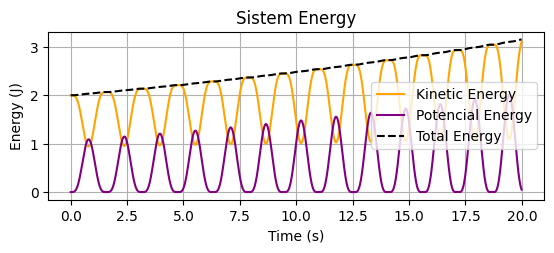

In [103]:
plot_enery_time(time, E_kin, E_pot, E_total)

### Simulación con amortoguamiento

In [91]:
# System parameters
mass = Mass(position=[1.0, 0.0], velocity=[1.0, 2.0], mass=1.0)
spring = Spring(k=10.0, rest_length=1.0)
system = System(mass=mass, spring=spring, damping=0.1)

In [88]:
# Simulation
t_max = 20.0
dt = 0.01
system.simulate(t_max, dt)

In [92]:
# Get results
data_file = "data/simulation_data.dat"
data = np.loadtxt(data_file, skiprows=1)
data.shape

time = data[:, 0]
x, y = data[:, 1], data[:, 2]
vx, vy = data[:, 3], data[:, 4]
E_kin, E_pot, E_total = data[:, 5], data[:, 6], data[:, 7]

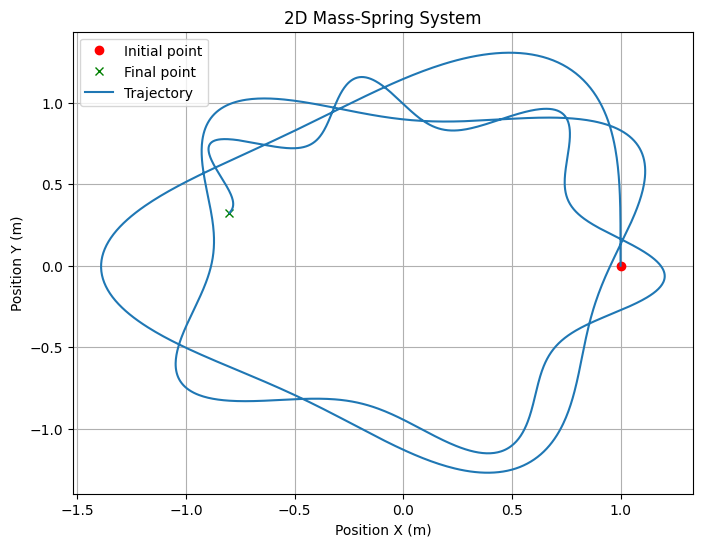

In [94]:
plot_trayectory(x, y)

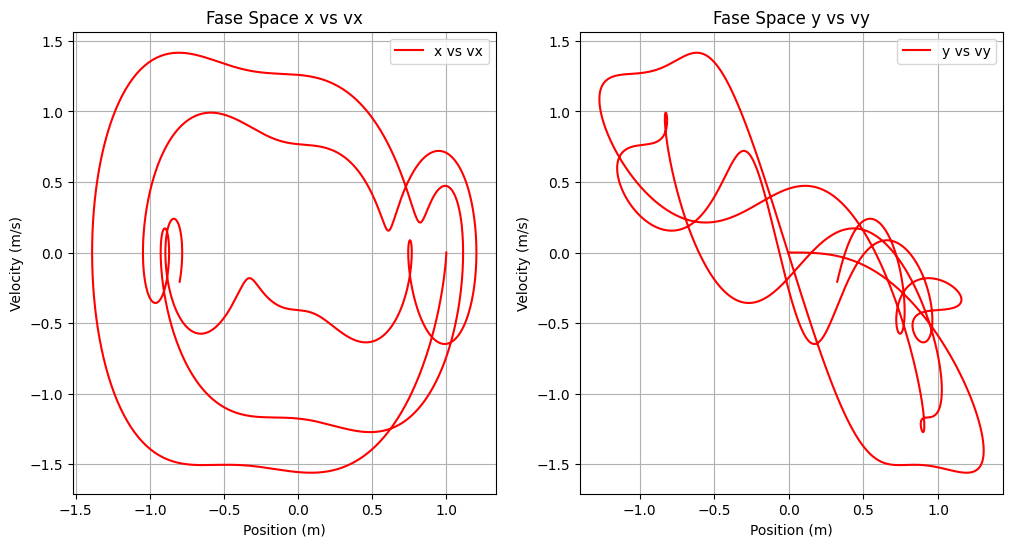

In [95]:
plot_fase_space(x, vx, y, vy)

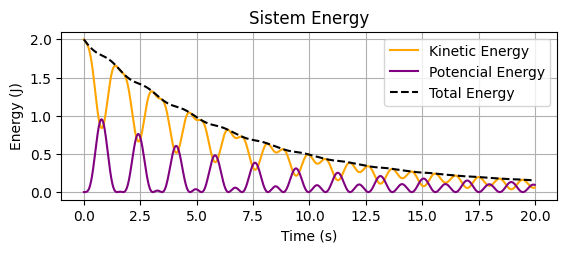

In [96]:
plot_enery_time(time, E_kin, E_pot, E_total)